In [1]:
#importing the useful libraries
import sys
import scipy
import numpy as np
import seaborn as sn
import pandas as pd
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.plotting import scatter_matrix
from pandas import read_csv
import sklearn
from sklearn import datasets
from sklearn import *
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFECV
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
!pip install plotnine
from plotnine import *
import matplotlib.pyplot as plt
import datetime
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
# if using a Jupyter notebook, include:
%matplotlib inline

In [110]:
df = pd.read_excel('data.xlsx')

In [111]:
df.head()

,Region,Procurement Path,GIA Building Total (at start),Building Category,Project Status,Storeys,Inpatient Beds,Operating Theatres,Site for development,Source of costs,Outturn Cost
0,London,P22,4335.0,Mental Health,Built,2.0,74.0,NaN,Hospital grounds,Trust cost plan,25133111.0
1,London,P21,22945.0,District (Medium),Built,5.0,101.0,8.0,Hospital grounds,Trust cost plan,103938557.0
2,South East,P21,9200.0,Emergency centre,Built,3.0,NaN,NaN,Hospital grounds,Trust cost plan,35097831.0
3,South East,P21,9109.0,District (Medium),Under construction,4.0,48.0,6.0,Greenfield,Trust cost plan,63972666.0
4,North East,P22,10536.0,Emergency centre,Built,1.0,NaN,NaN,Hospital grounds,Trust cost plan,23086111.0


In [112]:
# change unit of outturn_cost_gbp_uk 
df = df.drop(columns=['Inpatient Beds'])
#df['Outturn Cost'] = df['Outturn Cost'] / (10**7)

In [113]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Log-transform numerical columns
df[numerical_columns] = np.log1p(df[numerical_columns])

In [114]:
df.columns = df.columns.str.strip() 
df.dropna()

# Cleaning the data
# Capitalise the word for each categorical variable 

df['Region'] = df['Region'].str.capitalize()
df['Procurement Path'] = df['Procurement Path'].str.capitalize()
df['Building Category'] = df['Building Category'].str.capitalize().str.strip()
df['Project Status'] = df['Project Status'].str.capitalize()
df['Site for development'] = df['Site for development'].str.capitalize()
df['Source of costs'] = df['Source of costs'].str.capitalize()

In [115]:
# one-hot encoding to make categorical data numerical
# drop_first=true is used to break colliarity, as otherwise the linear model will be off
dfn = pd.get_dummies(df,drop_first=True)
dfn.shape

(59, 41)

In [116]:
# Replacing infinite with nan
dfn.replace([np.inf, -np.inf], np.nan, inplace=True)

In [117]:
# imputate by using median method
dfn['Storeys'] = dfn['Storeys'].fillna(dfn['Storeys'].median())
dfn['GIA Building Total (at start)'] = dfn['GIA Building Total (at start)'].fillna(dfn['GIA Building Total (at start)'].median())
dfn['Operating Theatres'] = dfn['Operating Theatres'].fillna(dfn['Operating Theatres'].median())
#dfn['Inpatient Beds'] = dfn['Inpatient Beds'].fillna(dfn['Inpatient Beds'].median())


In [118]:
#splitting data into x and y
X = dfn.drop('Outturn Cost', axis=1)
y= dfn['Outturn Cost']

In [119]:
dfn.head()

,GIA Building Total (at start),Storeys,Operating Theatres,Outturn Cost,Region_East of england,Region_International,Region_London,Region_North east,Region_North west,Region_Northern ireland,...,Site for development_Hospital grounds,Site for development_New build hospital,Source of costs_Elemental cost analysis template,Source of costs_Elemental cost breakdown,Source of costs_Fbc,Source of costs_Obc,Source of costs_Other,Source of costs_Trust cost plan,Source of costs_Works cost analysis template,Source of costs_Works cost analysis template - only tender cost provided
0,8.374708,1.098612,1.777674,17.039697,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,10.040899,1.791759,2.197225,18.459310,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,9.127067,1.386294,1.777674,17.373650,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,9.117128,1.609438,1.945910,17.973966,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9.262648,0.693147,1.777674,16.954742,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [120]:
# rfe works by fitting the ml model, ranking features by importance, discarding the least important fetaure, re-fitting the model
# and then recursively doing this until the selected number of features is left

# implementing rfe using a linear model selecting top 10 features

# create pipeline
rfe = RFE(estimator=linear_model.LinearRegression(fit_intercept=False), n_features_to_select=10)
model = linear_model.LinearRegression(fit_intercept=False)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model using cross validation
# cv splits the data into 10 groups, then takes out one group to be the test data and evaluates it 
# this is repeated so each group is evaluated as the test data, and then the results of all are averaged
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -1.310 (2.163)


In [121]:
# we can now compare different algoritms to find one with the lowest MAE
# they have to be regression algorithms 
# the algorithm in the rfe also has to be 'A supervised learning estimator with a fit method that provides information about 
#                                          feature importance (e.g. coef_, feature_importances_).'
# https://scikit-learn.org/stable/supervised_learning.html this page lists all supervised learning algorithms in sklearn
# There may be more that could be tested

# get a list of models to evaluate
# we don't yet know the optimum number of features, so I have chosen 15 arbitrarily -this is about 35% of the features
# you don't want to include too many features as some can negatively affect the model's accuracy
def get_models():
	models = dict()
	# linear regresssion
	rfe = RFE(estimator=linear_model.LinearRegression(fit_intercept=False), n_features_to_select=25)
	model = linear_model.LinearRegression(fit_intercept=False)
	models['LR'] = Pipeline(steps=[('s',rfe),('m',model)])
	 #bayesian ridge regression
	rfe = RFE(estimator=linear_model.BayesianRidge(), n_features_to_select=10)
	model = linear_model.BayesianRidge()
	models['BRR'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=10)
	model = DecisionTreeRegressor()
	models['CART'] = Pipeline(steps=[('s',rfe),('m',model)])
	# random forest
	rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)
	model = RandomForestRegressor()
	models['RF'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gradient boosting machine
	rfe = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10)
	model = GradientBoostingRegressor()
	models['GBM'] = Pipeline(steps=[('s',rfe),('m',model)])
	# support vector machine
	rfe = RFE(estimator=LinearSVR(random_state=0, tol=1e-5), n_features_to_select=10)
	model = LinearSVR(random_state=0, tol=1e-5)
	models['SVM'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

 
# evaluate each model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
    
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>LR -0.712 (0.430)
>BRR -0.363 (0.094)
>CART -0.457 (0.113)
>RF -0.375 (0.108)
>GBM -0.366 (0.106)
>SVM -0.470 (0.146)


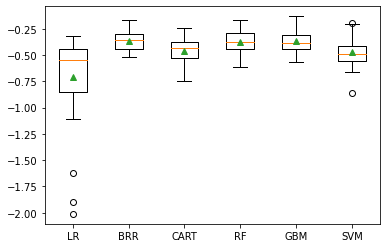

In [122]:
# plot model performance for comparison
#orange line is median, green triangle is mean, box shows variation of scores
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## BRR

In [123]:
#splitting data into x and y
X = dfn.drop('Outturn Cost', axis=1)
y= dfn['Outturn Cost']
# split our data into training data and testing data for ML 
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

# print the info about the split data
print('x_train shape is',x_train.shape,'\nx_test shape is',x_test.shape)
print('y_train shape is',y_train.shape,'\ny_test shape is',y_test.shape)
print('y_train means are',round(np.mean(y_train), 3),'\ny_test mean is',round(np.mean(y_test), 3))

#scaling the data 
#without scaling the model will be biased towards features with higher values ranges
scaler_x = preprocessing.RobustScaler(quantile_range=(25.0, 75.0)).fit(x_train)
scaler_y = preprocessing.RobustScaler(quantile_range=(25.0, 75.0)).fit(np.array(y_train).reshape(-1, 1)) 
x_train_s = scaler_x.transform(x_train)
y_train_s = scaler_y.transform(np.array(y_train).reshape(-1, 1))
x_test_s = scaler_x.transform(x_test)
y_test_s = scaler_y.transform(np.array(y_test).reshape(-1, 1))


x_train shape is (44, 40) 
x_test shape is (15, 40)
y_train shape is (44,) 
y_test shape is (15,)
y_train means are 17.899 
y_test mean is 18.574


In [124]:
# define the model with default parameters and fit it with train data.
bay_ridge = BayesianRidge()
print(bay_ridge)
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300, tol=0.001, verbose=False) 
 
bay_ridge.fit(x_train_s, y_train_s)

BayesianRidge()


C:\Users\Shen_Y\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


BayesianRidge()

In [125]:
#We can check the model score that is R-squared metrics.

score=bay_ridge.score(x_train_s, y_train_s)
print("Model score (R-squared): %.2f" % score)

Model score (R-squared): 0.94


In [126]:
# Next, we'll predict the test data and check the accuracy level.

ypred = bay_ridge.predict(x_test_s)
mse = mean_squared_error(y_test_s, ypred)
print("MSE: %.2f" % mse) 
print("RMSE: %.2f" % sqrt(mse))

MSE: 0.11
RMSE: 0.34


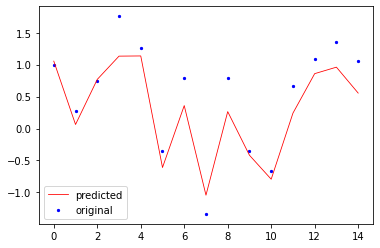

In [127]:
x_ax = range(len(y_test_s))
plt.scatter(x_ax, y_test_s, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 

In [128]:
# Print coefficientsx for each features
print(pd.Series(bay_ridge.coef_, index = X.columns))

# print the interceotion
print('BRR linear modle intercept:  {}'.format(linridge.intercept_))

GIA Building Total (at start)                                               6.668861e-01
Storeys                                                                     9.072460e-02
Operating Theatres                                                          1.078931e-01
Region_East of england                                                      7.459221e-02
Region_International                                                       -1.673529e-01
Region_London                                                               6.868206e-02
Region_North east                                                          -4.216474e-02
Region_North west                                                           2.840808e-02
Region_Northern ireland                                                    -2.104676e-02
Region_Scotland                                                            -9.259876e-02
Region_South east                                                           9.071236e-02
Region_South west    

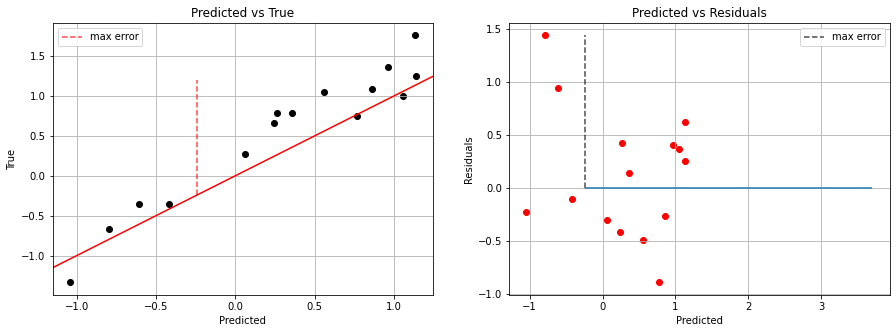

In [131]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax[0].scatter(ypred, y_test_s, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_pred, ymax=max_pred+max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
    
## Plot predicted vs residuals
ax[1].scatter(ypred, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(y_pred), xmax=np.max(y_pred))
ax[1].legend()
plt.savefig('LRmodelPredictions.png',dpi=300)
plt.show()

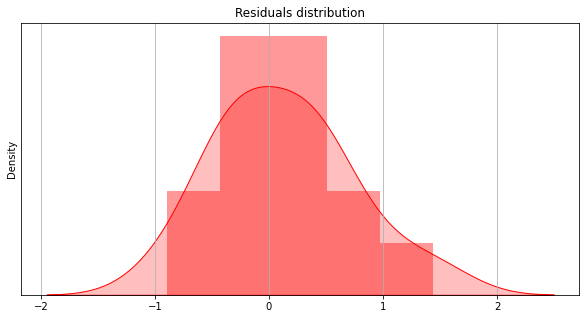

In [132]:
#a residuals distribution plot
fig, ax = plt.subplots(figsize=(10,5))
sn.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.savefig('residuals.png',dpi=300)
plt.show()
#this has a normal distribution which is good